# **Median Household Income and Access to Grocery Stores**

## Samantha Guerrero and Jessica Melendez

Our research questions for this project include:
1. Is income and race correlated to higher rates of policing?
2. Is income related to resources in the built environment (i.e., access to grocery stores, green/open space, or the lack thereof,) as well? 
3. And does access to or lack of access to these resources also correlate with higher rates of policing? 

For our midterm we decided we wanted to begin our research by understanding what correlation there was between median household income and access to grocery stores. We decided that we would pull data from census tracts as well as zip codes so we could begin comparing communities like West LA and South LA in our data.

First let's import our libraries and data...

In [1]:
import pandas as pd

from io import StringIO

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

import numpy as np

import pysal.viz.mapclassify as mc

from matplotlib.colors import rgb2hex

from matplotlib.colors import ListedColormap

plt.style.use('seaborn')

import plotly.express as px


/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


We'll be looking at median household income for now.

In [2]:
LA_income = gpd.read_file('data/censusincome.geojson')

Only 5 columns but a ton of data. Let's see what we can do

In [3]:
LA_income.shape

(2347, 5)

In [4]:
LA_income.head()

geoid                                   name  B19013001  \
0        05000US06037                 Los Angeles County, CA    68044.0   
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA    63534.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA    90389.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA    44083.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA    43713.0   

   B19013001, Error                                           geometry  
0             347.0  MULTIPOLYGON (((-118.70339 34.16859, -118.7033...  
1           16806.0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2            9796.0  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3            9483.0  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4            4639.0  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...

In [5]:
LA_income.tail()

geoid                                   name  B19013001  \
2342  14000US06037980031  Census Tract 9800.31, Los Angeles, CA        NaN   
2343  14000US06037980033  Census Tract 9800.33, Los Angeles, CA        NaN   
2344  14000US06037990100     Census Tract 9901, Los Angeles, CA        NaN   
2345  14000US06037990200     Census Tract 9902, Los Angeles, CA        NaN   
2346  14000US06037990300     Census Tract 9903, Los Angeles, CA        NaN   

      B19013001, Error                                           geometry  
2342               NaN  MULTIPOLYGON (((-118.29105 33.75378, -118.2905...  
2343               NaN  MULTIPOLYGON (((-118.24897 33.75590, -118.2470...  
2344               NaN  MULTIPOLYGON (((-118.95114 33.99643, -118.9505...  
2345               NaN  MULTIPOLYGON (((-118.63598 34.03255, -118.6325...  
2346               NaN  MULTIPOLYGON (((-118.47656 33.75038, -118.4661...

In [6]:
LA_income.sample()

geoid                                   name  B19013001  \
1525  14000US06037530005  Census Tract 5300.05, Los Angeles, CA    88750.0   

      B19013001, Error                                           geometry  
1525           11818.0  MULTIPOLYGON (((-118.12508 34.03108, -118.1250...

Okay, lets plot our data to get a sense of what area we're looking at

In [7]:
LA_income.plot(figsize=(10,10))

<AxesSubplot:>

Yup! LA County, perfect! Now, let's drop our county row, labeled as 0. We don't want that skewing our data. 

In [8]:
LA_income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2347 non-null   object  
 1   name              2347 non-null   object  
 2   B19013001         2311 non-null   float64 
 3   B19013001, Error  2307 non-null   float64 
 4   geometry          2347 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 91.8+ KB


In [9]:
LA_income.geoid.head()

0          05000US06037
1    14000US06037101110
2    14000US06037101122
3    14000US06037101210
4    14000US06037101220
Name: geoid, dtype: object

In [10]:
LA_income = LA_income.drop([0])

In [11]:
LA_income.head()

geoid                                   name  B19013001  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA    63534.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA    90389.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA    44083.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA    43713.0   
5  14000US06037101300     Census Tract 1013, Los Angeles, CA    81776.0   

   B19013001, Error                                           geometry  
1           16806.0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2            9796.0  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3            9483.0  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4            4639.0  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
5           11857.0  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...

Great! Now let's rename these columns for clarity

In [12]:
list(LA_income)

['geoid', 'name', 'B19013001', 'B19013001, Error', 'geometry']

In [13]:
LA_income.columns = ['geoid',
 'Census Tract',
 'Median HH Income',
 'Inflation Adjusted',
 'geometry']


In [14]:
LA_income.head()

geoid                           Census Tract  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA   
5  14000US06037101300     Census Tract 1013, Los Angeles, CA   

   Median HH Income  Inflation Adjusted  \
1           63534.0             16806.0   
2           90389.0              9796.0   
3           44083.0              9483.0   
4           43713.0              4639.0   
5           81776.0             11857.0   

                                            geometry  
1  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
5  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...

Let's see a random sample and get more familiar with the Median Household Income Column.

In [15]:
random_tract = LA_income.sample()
random_tract

geoid                           Census Tract  \
1262  14000US06037408705  Census Tract 4087.05, Los Angeles, CA   

      Median HH Income  Inflation Adjusted  \
1262           72656.0              7516.0   

                                               geometry  
1262  MULTIPOLYGON (((-117.88930 33.98727, -117.8892...

In [16]:
random_tract.iloc[0]['Median HH Income']

72656.0

In [17]:
LA_income['Median HH Income'].head()

1    63534.0
2    90389.0
3    44083.0
4    43713.0
5    81776.0
Name: Median HH Income, dtype: float64

In [18]:
LA_income['Median HH Income'].mean()

73242.84415584416

In [19]:
LA_income['Median HH Income'].median()

66212.0

Since this is census data, let's assess what the numbers might tell us. What are the percentiles? What's the maximum median household income and what is the minimum? Is there a prominent gap between income levels?

In [20]:
LA_income['Median HH Income'].describe()

count      2310.000000
mean      73242.844156
std       34516.005733
min        9191.000000
25%       48191.000000
50%       66212.000000
75%       90403.250000
max      250001.000000
Name: Median HH Income, dtype: float64

It looks like the minimum household income in a census track is 9,191. (Interesting, I'd like to know what area that median household income level falls on.) While the maximum median household income in a census track is 250,001. Thats a huge gap! I definitely want to see where folks are making maximum 250,001. This can also help us when we bring in out grocery store data to help us visualize where more grocery stores are located. Is there a concentration in areas with lower income where it might be needed or in places of higher income levels, where people might be able to afford higher concentrations and more quality grocery stores.

<AxesSubplot:ylabel='Frequency'>

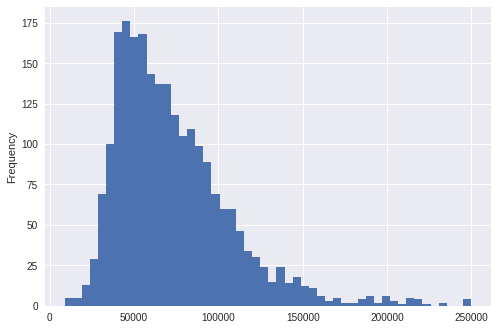

In [21]:
LA_income['Median HH Income'].plot.hist(bins=50)

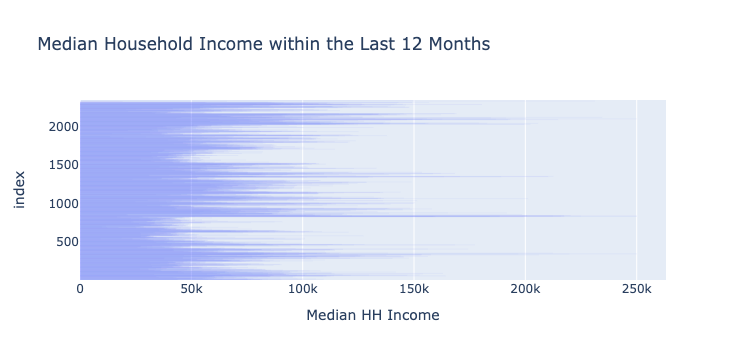

In [22]:
fig = px.bar(LA_income,
       x='Median HH Income',
       title='Median Household Income within the Last 12 Months'
      )

fig.update_traces(marker_line_width=0)

fig.show()

By looking at the data, it seems like there's a high concentration of census tracts where people make around 50,000. Further, most census tracts' median household income ranges from around 50,000 to almost 100,000. 100,000 is where we begin to see a drop in census tracts that make that amount or close to that amount. The frequency continues to drop, less and less census tracts have identified people that make close to 200,000 and the outlier seems to be census tracts where the median household income is 250,000. 

In [23]:
LA_income_sorted = LA_income.sort_values(by='Median HH Income',ascending = False)

Let's keep our focus on median household income.

In [24]:
LA_income_sorted[['geoid','Median HH Income']].head(10)

geoid  Median HH Income
2101  14000US06037670500          250001.0
341   14000US06037141700          250001.0
832   14000US06037262303          250001.0
833   14000US06037262400          250001.0
2120  14000US06037701201          234519.0
2332  14000US06037980019          231250.0
834   14000US06037262501          224962.0
840   14000US06037264000          220417.0
339   14000US06037141500          219698.0
828   14000US06037262100          217462.0

If we sort out the top median household income numbers we can begin visualizing the data below. Let's take a look...

<AxesSubplot:>

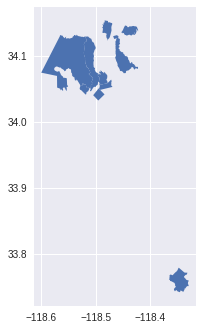

In [25]:
LA_income_sorted.head(10).plot()

okay, we're seeing something now. If we sort out the top 100 we can see more of a range. Let's take a look...

In [26]:
LA_income_sorted.head(100).plot(figsize=(10,10),column='Median HH Income',legend=True)

<AxesSubplot:>

Let's continue sorting. How many census tracts have people making less than 50,000 where most of the concentration starts. 

In [27]:
list(LA_income)

['geoid', 'Census Tract', 'Median HH Income', 'Inflation Adjusted', 'geometry']

In [28]:
LA_income['Median HH Income'] < 50000

1       False
2       False
3        True
4        True
5       False
        ...  
2342    False
2343    False
2344    False
2345    False
2346    False
Name: Median HH Income, Length: 2346, dtype: bool

In [29]:
LA_income[LA_income['Median HH Income'] < 50000]

geoid                           Census Tract  \
3     14000US06037101210  Census Tract 1012.10, Los Angeles, CA   
4     14000US06037101220  Census Tract 1012.20, Los Angeles, CA   
21    14000US06037104203  Census Tract 1042.03, Los Angeles, CA   
31    14000US06037104701  Census Tract 1047.01, Los Angeles, CA   
32    14000US06037104703  Census Tract 1047.03, Los Angeles, CA   
...                  ...                                    ...   
2228  14000US06037910502  Census Tract 9105.02, Los Angeles, CA   
2231  14000US06037910601  Census Tract 9106.01, Los Angeles, CA   
2232  14000US06037910602  Census Tract 9106.02, Los Angeles, CA   
2234  14000US06037910605  Census Tract 9106.05, Los Angeles, CA   
2327  14000US06037980010  Census Tract 9800.10, Los Angeles, CA   

      Median HH Income  Inflation Adjusted  \
3              44083.0              9483.0   
4              43713.0              4639.0   
21             49609.0             11898.0   
31             35357.0              6270.0   
32             41875.0             14155.0   
...                ...                 ...   
2228           38784.0              4570.0   
2231           41563.0             10015.0   
2232           41538.0              3615.0   
2234           44665.0             10596.0   
2327           19167.0             11351.0   

                                               geometry  
3     MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4     MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
21    MULTIPOLYGON (((-118.41799 34.27964, -118.4170...  
31    MULTIPOLYGON (((-118.42190 34.26624, -118.4213...  
32    MULTIPOLYGON (((-118.40909 34.25446, -118.4072...  
...                                                 ...  
2228  MULTIPOLYGON (((-118.10766 34.58734, -118.1061...  
2231  MULTIPOLYGON (((-118.09427 34.58743, -118.0896...  
2232  MULTIPOLYGON (((-118.09411 34.57975, -118.0937...  
2234  MULTIPOLYGON (((-118.07620 34.56759, -118.0761...  
2327  MULTIPOLYGON (((-118.25165 34.08038, -118.2515...  

[651 rows x 5 columns]

Now, let's see what the data looks like if we combine the data to sort out only census tracts with less than 50,000 median household income and census tracts with over 90,000 median household income.

In [30]:
LA_income[(LA_income['Median HH Income'] < 50000) | (LA_income['Median HH Income'] > 90000)]


geoid                           Census Tract  \
2     14000US06037101122  Census Tract 1011.22, Los Angeles, CA   
3     14000US06037101210  Census Tract 1012.10, Los Angeles, CA   
4     14000US06037101220  Census Tract 1012.20, Los Angeles, CA   
10    14000US06037102107  Census Tract 1021.07, Los Angeles, CA   
11    14000US06037103101  Census Tract 1031.01, Los Angeles, CA   
...                  ...                                    ...   
2314  14000US06037920339  Census Tract 9203.39, Los Angeles, CA   
2315  14000US06037930101  Census Tract 9301.01, Los Angeles, CA   
2327  14000US06037980010  Census Tract 9800.10, Los Angeles, CA   
2332  14000US06037980019  Census Tract 9800.19, Los Angeles, CA   
2337  14000US06037980024  Census Tract 9800.24, Los Angeles, CA   

      Median HH Income  Inflation Adjusted  \
2              90389.0              9796.0   
3              44083.0              9483.0   
4              43713.0              4639.0   
10            109375.0             16677.0   
11             99875.0             17773.0   
...                ...                 ...   
2314          143047.0             42128.0   
2315          149063.0            136896.0   
2327           19167.0             11351.0   
2332          231250.0            117385.0   
2337          150250.0             13582.0   

                                               geometry  
2     MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3     MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4     MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
10    MULTIPOLYGON (((-118.36789 34.23939, -118.3678...  
11    MULTIPOLYGON (((-118.31760 34.27387, -118.3175...  
...                                                 ...  
2314  MULTIPOLYGON (((-118.67620 34.40900, -118.6759...  
2315  MULTIPOLYGON (((-118.28661 34.28156, -118.2865...  
2327  MULTIPOLYGON (((-118.25165 34.08038, -118.2515...  
2332  MULTIPOLYGON (((-118.59919 34.07436, -118.5991...  
2337  MULTIPOLYGON (((-118.51849 34.18389, -118.5184...  

[1238 rows x 5 columns]

Awesome! Now, let's try to plot this and create a chart.

<AxesSubplot:ylabel='Frequency'>

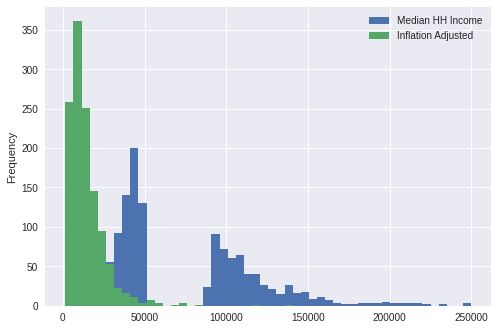

In [31]:
LA_income[(LA_income['Median HH Income'] < 50000) | (LA_income['Median HH Income'] > 90000)].plot.hist(bins=50)

In [32]:
missing_kwds = dict(color='grey', label='No Data')

Okay, the chart looks nice! I don't think this is what we intended to plot but this looks nice! What does it tell us? looks like the data is separated by median household income and inflation adjustments.

We'll come back to this part. Now, can we plot data for census tracts with less than 50,000 and those with more than 90,000?

In [33]:
new_income = LA_income[(LA_income['Median HH Income'] < 50000) | (LA_income['Median HH Income'] > 90000)]

In [34]:
new_income.info

<bound method DataFrame.info of                    geoid                           Census Tract  \
2     14000US06037101122  Census Tract 1011.22, Los Angeles, CA   
3     14000US06037101210  Census Tract 1012.10, Los Angeles, CA   
4     14000US06037101220  Census Tract 1012.20, Los Angeles, CA   
10    14000US06037102107  Census Tract 1021.07, Los Angeles, CA   
11    14000US06037103101  Census Tract 1031.01, Los Angeles, CA   
...                  ...                                    ...   
2314  14000US06037920339  Census Tract 9203.39, Los Angeles, CA   
2315  14000US06037930101  Census Tract 9301.01, Los Angeles, CA   
2327  14000US06037980010  Census Tract 9800.10, Los Angeles, CA   
2332  14000US06037980019  Census Tract 9800.19, Los Angeles, CA   
2337  14000US06037980024  Census Tract 9800.24, Los Angeles, CA   

      Median HH Income  Inflation Adjusted  \
2              90389.0              9796.0   
3              44083.0              9483.0   
4              43713.0   

In [35]:
new_income.head()

geoid                           Census Tract  \
2   14000US06037101122  Census Tract 1011.22, Los Angeles, CA   
3   14000US06037101210  Census Tract 1012.10, Los Angeles, CA   
4   14000US06037101220  Census Tract 1012.20, Los Angeles, CA   
10  14000US06037102107  Census Tract 1021.07, Los Angeles, CA   
11  14000US06037103101  Census Tract 1031.01, Los Angeles, CA   

    Median HH Income  Inflation Adjusted  \
2            90389.0              9796.0   
3            44083.0              9483.0   
4            43713.0              4639.0   
10          109375.0             16677.0   
11           99875.0             17773.0   

                                             geometry  
2   MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3   MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4   MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
10  MULTIPOLYGON (((-118.36789 34.23939, -118.3678...  
11  MULTIPOLYGON (((-118.31760 34.27387, -118.3175...

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



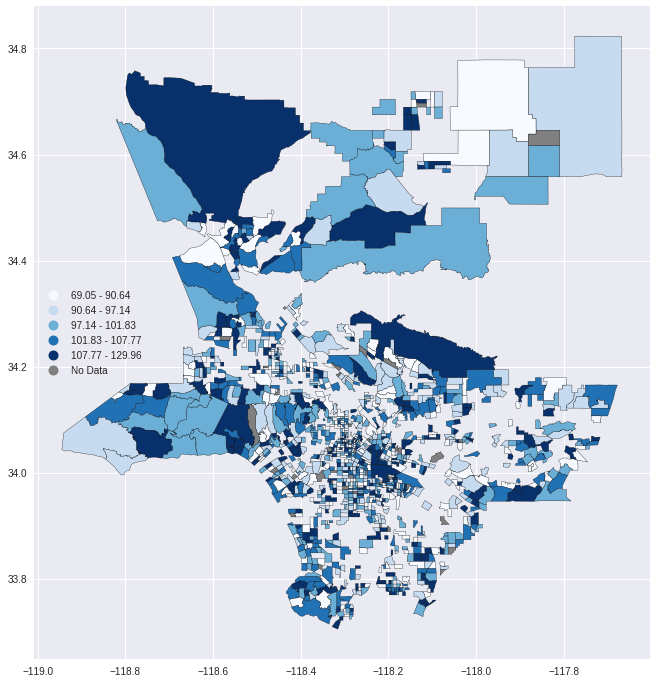

In [36]:
new_income['random'] = np.random.normal(100, 10, len(new_income))
# assign missing values
new_income.loc[np.random.choice(new_income.index, 40), 'random'] = np.nan

# categorize the numerical column
k = 5
quantiles = mc.Quantiles(new_income.random.dropna(), k=k)
new_income['Median HH Income'] = quantiles.find_bin(new_income.random).astype('str')

new_income.loc[new_income.random.isnull(), 'Median HH Income'] = 'No Data'

# add grey to a colormap to represent missing value
cmap = plt.cm.get_cmap('Blues', k)
cmap_list = [rgb2hex(cmap(i)) for i in range(cmap.N)]
cmap_list.append('grey')
cmap_with_grey = ListedColormap(cmap_list)

# plot map
fig, ax = plt.subplots(figsize=(15, 12))
new_income.plot(column='Median HH Income', edgecolor='k', cmap=cmap_with_grey,
         legend=True, legend_kwds=dict(loc='center left'),
         ax=ax)

# get all upper bounds in the quantiles category
upper_bounds = quantiles.bins
# get and format all bounds
bounds = []
for index, upper_bound in enumerate(upper_bounds):
    if index == 0:
        lower_bound = new_income.random.min()
    else:
        lower_bound = upper_bounds[index-1]

    bound = f'{lower_bound:.2f} - {upper_bound:.2f}'
    bounds.append(bound)
    
# get all the legend labels
legend_labels = ax.get_legend().get_texts()
# replace the numerical legend labels
for bound, legend_label in zip(bounds, legend_labels):
    legend_label.set_text(bound)

In [37]:
new_income_web_mercator =new_income.to_crs(epsg=3857)

KeyError: "None of [Index(['0', '2', '4', '1', '1', '2', '1', '2', '2', '2',\n       ...\n       '0', '4', '3', '0', '3', '0', '4', '0', '4', '0'],\n      dtype='object', length=1238)] are in the [columns]"

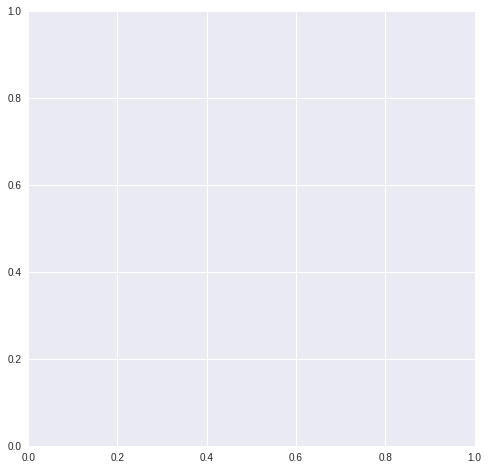

In [38]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(8, 8))

# add the layer with ax=ax in the argument 
new_income_web_mercator[new_income_web_mercator['Median HH Income']].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis(extent)

# set a title
ax.set_title('Median Household Income',fontsize=16)

# add a basemap

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

Alright, so we tried ignoring that error and proceeded to add a basemap. I mean it gave us a map and it looked cool! But that error!  There was an issue in making a copy of that data set, therefor it is flawed, hence the issues applying it to a basemap above. 

Now, let's try that one more tume and see if we can add a basemap to it. Let's start with census tracts that have abouve the 75th percentile, so let's look at median household income greater than 90,000

In [39]:
LA_income[LA_income['Median HH Income'] > 90000].plot(figsize=(12,10))

<AxesSubplot:>

DISGUSTING! We mean, look at that! Much MUCH better than the 1st map! So now, we're beginning to visualize the data. Let's try that for median household income less than the median of 66,000. So... let's go with less than 50,000.

In [40]:
LA_income[LA_income['Median HH Income'] < 50000].plot(figsize=(12,10))

<AxesSubplot:>

Now, let's add some basemaps to visualize this data even more and get a sense of where these concentrations are located. Can we succeed this time?

In [41]:
LA_income_web_mercator = LA_income.to_crs(epsg=3857)

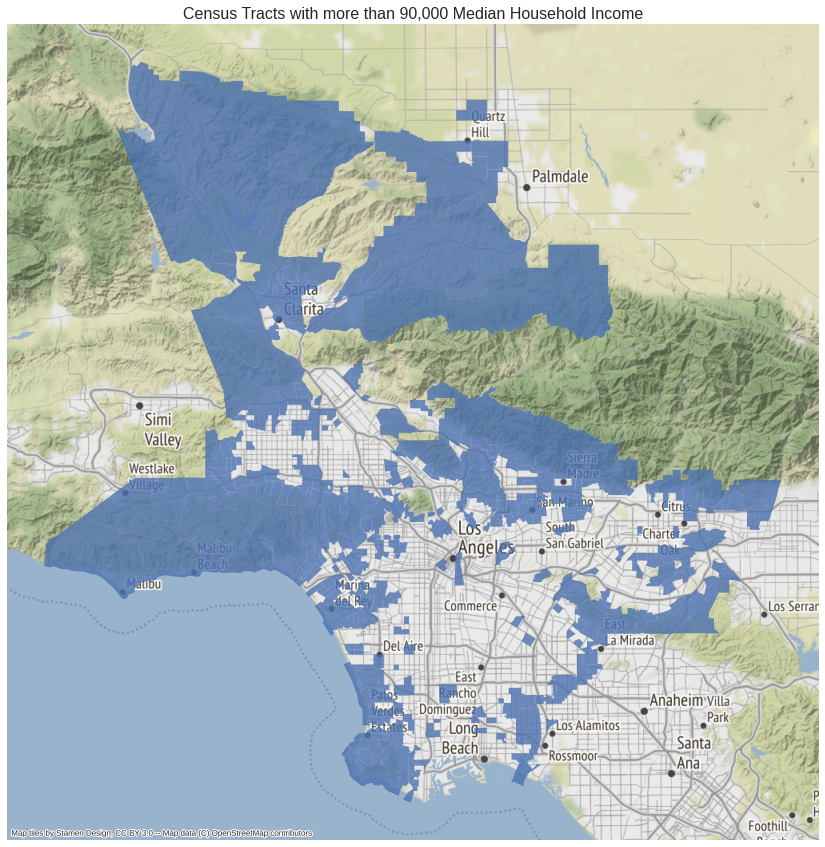

In [42]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
LA_income_web_mercator[LA_income_web_mercator['Median HH Income'] > 90000].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 90,000 Median Household Income',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

SUCCESS!!! There's one map for census tracts that make more than 90,000. Now we can begin visualizing the data even further. Looks like a lot of communities surrounding "urban" areas make over 90,000, including Santa Monica, West LA, Palos Verdes, Malibu, and even upwards towards Santa Clarita. Now let's see what we can visualize with median household income less than 50,000.

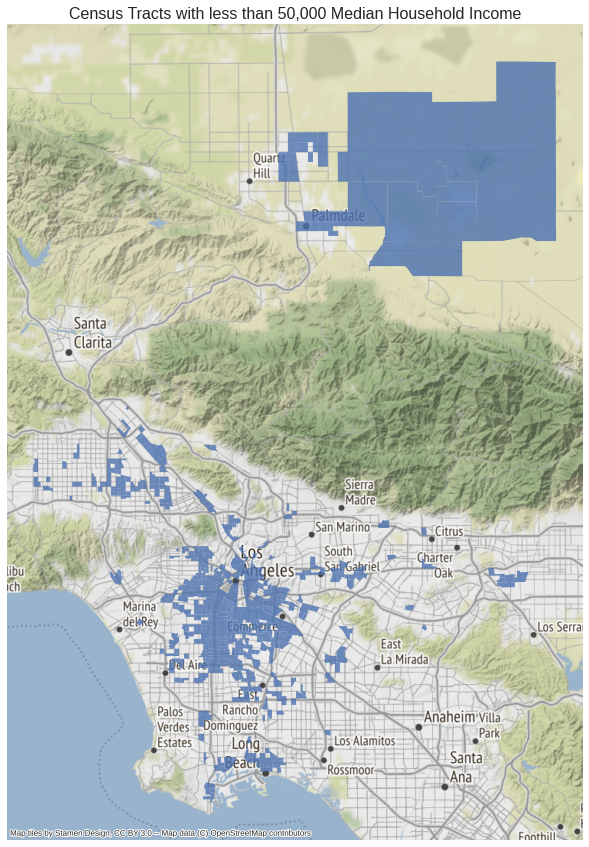

In [43]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
LA_income_web_mercator[LA_income_web_mercator['Median HH Income'] < 50000].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with less than 50,000 Median Household Income',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

Another success! Okay, now with this data we can get a sense of where all the census tracts with a median household income of less than 50,000 are located. It's interesting that a lot of the concentrations are central to Los Angeles County, including census tracts in South Central. What's also interesting is that this data extends towards Palmdale area and you can see another concentration there of census tracts with a median household income less than 50,000. On a more personal note, what's more interesting is that since organizing in South Central since 2015, a lot of my students and their families were displaced or moved to the Palmdale area. And though this visualizing we can see economically, or income-wise, it is not much different than South Central. 

I wonder what the data would look like if we mapped out median household income for less thatn 26,000 which is considered poverty level according to the LA Almanac for an average between a 3-5 person household

<AxesSubplot:>

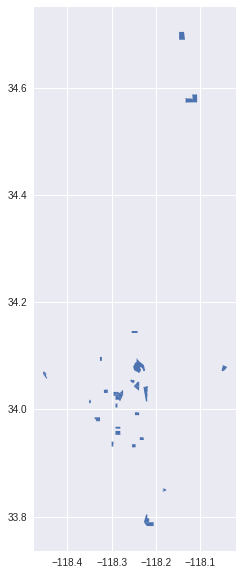

In [44]:
LA_income[LA_income['Median HH Income'] < 26500].plot(figsize=(12,10))

In [45]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
LA_income_web_mercator[LA_income_web_mercator['Median HH Income'] < 26500].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with less than 26500 Median Household Income',fontsize=16)

# add a basemap
ctx.add_basemap(ax)



If we look closely we can see that census tracts with a median household income of less than 26500 are still located in or near South Central and we see small pockets of clusters along the 110 freeway, especially Central Los Angeles. 

Let's try wokring on an interactive map now because it is so hard to see the last map!

In [46]:
import folium

In [47]:
m = folium.Map()
m

In [48]:
import folium
from folium.plugins import MarkerCluster

In [54]:
fig, ax = plt.subplots(figsize=(15,12)
                       
new_income.plot(column='Median HH Income', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax, # this assigns the map to the subplot,
            legend=True
           )

ax.axis("off")
ax.set_title("Median HH Income")

SyntaxError: invalid syntax (3312434277.py, line 3)

In [ ]:
#add empty folium map 
m = folium.Map(location=[34.051850, -118.243322], tiles=None)

folium.raster_layers.TileLayer(
    location=[34.051850, -118.243322],
    tiles='https://api.mapbox.com/styles/v1/cgiamarino/ckh3zcblc09pp19n0adewnboh/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoiY2dpYW1hcmlubyIsImEiOiJjanAyd2hwNWUwYnJ3M3dzMHF4MnJkZ29uIn0.7tLnplw65tLmywvvIPGSKA',
    attr='Mapbox',
    API_key='pk.eyJ1IjoiY2dpYW1hcmlubyIsImEiOiJjanAyd2hwNWUwYnJ3M3dzMHF4MnJkZ29uIn0.7tLnplw65tLmywvvIPGSKA',
    name='Monochrome',
    zoom_start=9  # Limited levels of zoom for free Mapbox tiles.
).add_to(m)

#create choropleth
folium.Choropleth(
    geo_data=svi,
    name='SVI',
    show=False,
    data=svi_data,
    columns=['FIPS', 'RPL_THEMES'],
    fill_color='PuRd',
    key_on='feature.properties.FIPS',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Social Vulnerability Index (SVI)'
).add_to(m)

#create feature group so that business layer can be added to drop down
f2=folium.FeatureGroup(name='Business Closures', show=False).add_to(m)

# add the businesses to the feature group
for index, row in df_map.iterrows():
    folium.Circle(
        radius=30,
        location=[row.lat,row.lon], 
        popup=row.business_name+ ' '+row.Address, 
        tooltip=row.business_name,
        overlay=False).add_to(f2)



m.save('svi_business.html')

folium.LayerControl(position='topright', collapsed=True, autoZIndex=True).add_to(m)


m
